# Apriori Algorithm in Healthcare (Pharmacy Drug Purchases)

In [1]:
!pip install mlxtend --quiet

In [6]:
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [8]:
transactions = [
    ['Paracetamol', 'Vitamin C', 'Cough Syrup'],
    ['Antibiotic', 'Paracetamol'],
    ['Vitamin C', 'Cough Syrup', 'Paracetamol'],
    ['Antibiotic', 'Vitamin C'],
    ['Pain Relief Gel', 'Paracetamol'],
    ['Cough Syrup', 'Vitamin C'],
    ['Paracetamol', 'Antibiotic'],
    ['Vitamin C', 'Pain Relief Gel'],
    ['Cough Syrup', 'Antibiotic'],
    ['Paracetamol', 'Vitamin C', 'Pain Relief Gel']
]

In [9]:
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_array, columns=te.columns_)

In [10]:
print("Sample Transaction Data:")
df.head()

Sample Transaction Data:


,Antibiotic,Cough Syrup,Pain Relief Gel,Paracetamol,Vitamin C
0,False,True,False,True,True
1,True,False,False,True,False
2,False,True,False,True,True
3,True,False,False,False,True
4,False,False,True,True,False


In [11]:
frequent_itemsets = apriori(df, min_support=0.3, use_colnames=True)
print("\nFrequent Itemsets:")
frequent_itemsets


Frequent Itemsets:


,support,itemsets
0,0.4,(Antibiotic)
1,0.4,(Cough Syrup)
2,0.3,(Pain Relief Gel)
3,0.6,(Paracetamol)
4,0.6,(Vitamin C)
5,0.3,"(Vitamin C, Cough Syrup)"
6,0.3,"(Vitamin C, Paracetamol)"


In [12]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
print("\nAssociation Rules:")
rules[['antecedents','consequents','support','confidence','lift']]


Association Rules:


,antecedents,consequents,support,confidence,lift
0,(Vitamin C),(Cough Syrup),0.3,0.50,1.25
1,(Cough Syrup),(Vitamin C),0.3,0.75,1.25


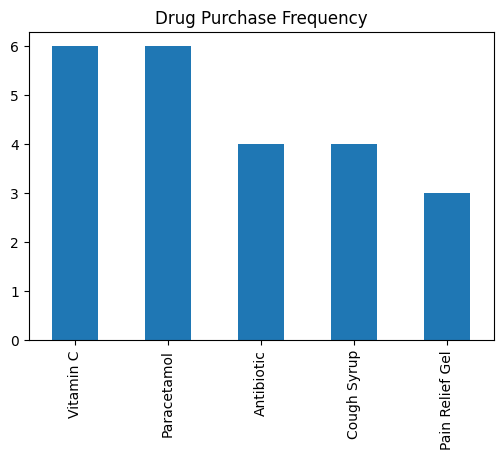

In [13]:
item_counts = df.sum().sort_values(ascending=False)
item_counts.plot(kind='bar', figsize=(6,4), title='Drug Purchase Frequency')
plt.show()

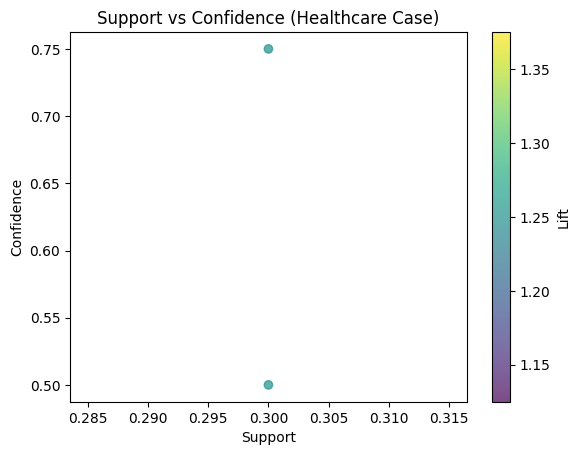

In [14]:
plt.scatter(rules['support'], rules['confidence'], alpha=0.7, c=rules['lift'], cmap='viridis')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs Confidence (Healthcare Case)')
plt.colorbar(label='Lift')
plt.show()

In [15]:
# Interpretation: Paracetamol often co-occurs with Vitamin C -> Seasonal flu combo.

rules.to_csv("Healthcare_Association_Rules.csv", index=False)
print("\nRules exported to Healthcare_Association_Rules.csv")



Rules exported to Healthcare_Association_Rules.csv
